## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata
study_results.head()
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")
# Display the data table for preview
combined_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [4]:
# Checking the number of mice.
num_mice = combined_df["Mouse ID"].count()
num_mice


1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID. 
clean_data = combined_df.drop_duplicates(subset = ["Mouse ID", "Timepoint"]) 
#to verify clean data,
combined_df.groupby(["Timepoint", "Mouse ID"]).ngroups


1888

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
clean_data.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = clean_data.drop_duplicates(subset = ["Mouse ID"])
clean_df.tail(100)

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
1217     n630     Propriva  Female          15          29          0   
1219     n671    Infubinol    Male          18          25          0   
1226     n678     Propriva    Male           5          29          0   
1229     n763      Placebo  Female          16          25          0   
1238     n923     Ketapril    Male          19          30          0   
...       ...          ...     ...         ...         ...        ...   
1858     z314     Stelasyn  Female          21          28          0   
1860     z435     Propriva  Female          12          26          0   
1863     z581    Infubinol  Female          24          25          0   
1873     z795     Naftisol  Female          13          29          0   
1883     z969     Naftisol    Male           9          30          0   

      Tumor Volume (mm3)  Metastatic Sites  
1217                45.0                 0  
1219                45.0                 0  
1226                45.0                 0  
1229                45.0                 0  
1238                45.0                 0  
...                  ...               ...  
1858                45.0                 0  
1860                45.0                 0  
1863                45.0                 0  
1873                45.0                 0  
1883                45.0                 0  

[100 rows x 8 columns]

In [8]:
# Checking the number of mice in the clean DataFrame.
clean_num_mice = clean_df["Mouse ID"].count()
clean_num_mice

249

## Summary Statistics

In [9]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).mean()
median = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).median()
var = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).var()
std = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).std()
sem = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).sem()

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen 
summary_df = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_df

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.393463            50.909965              43.138803   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.568014                0.525862  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [10]:
# Using the aggregation method, produce the same summary statistics in a single line

## Bar and Pie Charts

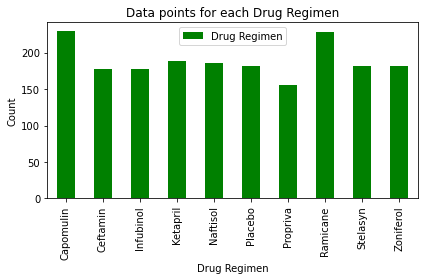

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
clean_num_mice = clean_df["Mouse ID"].uncount()
# First create a dataframe grouping by the 'Drug Regimen' column
drug_bar = clean_data.groupby('Drug Regimen')
# Create a dataframe counting the number of data points for each Drug Regimen
drug_count = pd.DataFrame(drug_bar['Drug Regimen'].count())

# Create a bar chart based off of the group series from before and label the title
count_plot = drug_count.plot(kind='bar', title="Data points for each Drug Regimen", color="green")

# Set the xlabel and ylabel using class methods
count_plot.set_xlabel("Drug Regimen")
count_plot.set_ylabel("Count")
plt.tight_layout()

plt.show()


In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
